In [7]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
import acquire

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [8]:
df = acquire.get_store_item_demand_data()

In [9]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,Unnamed: 0_x,store_address,store_city,store_state,store_zipcode,Unnamed: 0_y,item_brand,item_name,item_price,item_upc12,item_upc14
0,41,6.0,"Tue, 01 Jan 2013 00:00:00 GMT",730401,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
1,41,15.0,"Wed, 02 Jan 2013 00:00:00 GMT",730402,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
2,41,5.0,"Thu, 03 Jan 2013 00:00:00 GMT",730403,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
3,41,9.0,"Fri, 04 Jan 2013 00:00:00 GMT",730404,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
4,41,13.0,"Sat, 05 Jan 2013 00:00:00 GMT",730405,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016


### Exercise 1)
Convert date column to datetime format.

In [11]:
df.sale_date=pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

#Reset sale_date to be index:
df = df.set_index("sale_date").sort_index()

### Exercise 2)
Plot the distribution of sale_amount and item_price.


In [14]:
#groupby item_price & sale_amount.sum()to aggregate the data
by_date = df.groupby(['item_price']).sale_amount.sum().reset_index()
by_date.head()

,item_price,sale_amount
0,2.97,669925.0
1,3.72,937703.0
2,4.40,1471467.0
3,4.65,1070764.0
4,5.20,1203009.0


<AxesSubplot:xlabel='item_price'>

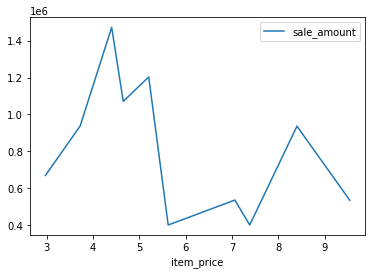

In [15]:
#plotting distribution of sale_amount and item_price
by_date.plot(x='item_price', y='sale_amount')

### Exercise 3)
Set the index to be the datetime variable.


In [17]:
#done above (in exercise 1)
df.head(2)

,item_id,sale_amount,sale_id,store_id,Unnamed: 0_x,store_address,store_city,store_state,store_zipcode,Unnamed: 0_y,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,41,6.0,730401,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016
2013-01-01 00:00:00+00:00,48,21.0,865525,5,4,1520 Austin Hwy,San Antonio,TX,78218,7,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631


### Exercise 4)
Add a 'month' and 'day of week' column to your dataframe.


In [18]:
df['month']= df.index.strftime('%m-%b')

In [21]:
df['day_of_week']= df.index.strftime('%A')

In [22]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,Unnamed: 0_x,store_address,store_city,store_state,store_zipcode,Unnamed: 0_y,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,41,6.0,730401,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,01-Jan,Tuesday
2013-01-01 00:00:00+00:00,48,21.0,865525,5,4,1520 Austin Hwy,San Antonio,TX,78218,7,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,01-Jan,Tuesday


### Exercise 5)
Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [23]:
df['sales_total']= df.sale_amount + df.item_price

In [24]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,Unnamed: 0_x,store_address,store_city,store_state,store_zipcode,Unnamed: 0_y,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,41,6.0,730401,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,01-Jan,Tuesday,11.62
2013-01-01 00:00:00+00:00,48,21.0,865525,5,4,1520 Austin Hwy,San Antonio,TX,78218,7,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,01-Jan,Tuesday,24.72


### Exercise 6)
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

#### SEE PREPARE.py file #######

____________________________________________________________________________________________________________

## Exercises
**Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

### Exercise 1)
Convert date column to datetime format.


### Exercise 2)
Plot the distribution of each of your variables.


### Exercise 3)
Set the index to be the datetime variable.


### Exercise 4)
Add a month and a year column to your dataframe.


### Exercise 5)
Fill any missing values.


### Exercise 6)
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.